# Initial Exploratory Data Analysis for the HR Separation (hrsepara) project
## Identify the correct working directory for source data
* '/data/discovery/hrsepara/core/'
## Identify the correct working directory for the analysis (both HDFS and LFS)
* '/data/discovery/hrsepara/staging/eda' and  '/home/kesj/working/hrsepara/eda/'
## begin to summarize data 


In [1]:
coredir = '/data/discovery/hrsepara/core/'
stgdir1 = '/data/discovery/hrsepara/staging/eda'
stgdir1local = '/home/kesj/work/hrsepara/eda'


In [2]:
import os,subprocess
import pandas as pd
import numpy as np

In [3]:
# check if the path exists
os.path.exists(stgdir1local)

True

In [4]:
def hdfs_path_exists(path):
    return subprocess.call(['hdfs','dfs','-ls',path])
    

In [5]:
hdfs_path_exists(coredir)

1

In [ ]:
# make the remote directory
!hdfs dfs -mkdir {stgdir1}

In [ ]:
# make the local directory
!mkdir '/home/kesj/work/hrsepara/eda'
#{stgdir1local}

%pwd

In [6]:
%cd {stgdir1local}

/home/kesj/work/hrsepara/eda


## Look at the files in {coredir}

In [11]:
fnames = !hdfs dfs -ls {coredir}

In [12]:
infilenames = [f.split()[-1] for f in fnames[1:]]

In [13]:
infilenames

['/data/discovery/hrsepara/core/EMPL',
 '/data/discovery/hrsepara/core/HISTCURR',
 '/data/discovery/hrsepara/core/HISTRET',
 '/data/discovery/hrsepara/core/HISTRETold',
 '/data/discovery/hrsepara/core/SBR',
 '/data/discovery/hrsepara/core/SR_BENEFIT.txt',
 '/data/discovery/hrsepara/core/SR_CKE.txt',
 '/data/discovery/hrsepara/core/SR_COMP.txt',
 '/data/discovery/hrsepara/core/SR_CPR.txt',
 '/data/discovery/hrsepara/core/SR_EAS.txt',
 '/data/discovery/hrsepara/core/SR_EDU.txt',
 '/data/discovery/hrsepara/core/SR_INS.txt',
 '/data/discovery/hrsepara/core/SR_LANG.txt',
 '/data/discovery/hrsepara/core/SR_LIC.txt',
 '/data/discovery/hrsepara/core/SR_RELO.txt']

In [ ]:
full_in_file_names = infilenames[:4]
for a in infilenames[4:]:
    full_in_file_names.append( coredir+'SR '+a)
full_in_file_names

# Now I need to get this data into a format so that I can read it from pandas

In [ ]:
!hdfs dfs -ls /data/discovery/hrsepara/core/HISTCURR

In [14]:
#define the currentworking directory:
cwd = os.path.abspath(os.curdir)
print cwd

/home/kesj/work/hrsepara/eda


In [15]:
## function to load into pandas from hdfs (by copying to local filespace)
def pandas_read_hdfs(infile,sep = ';',dtype_dict = None):
    # copy the infile to the cwd
    !hdfs dfs -get {infile} .
    # identify the local file name
    inname = infile[infile.rfind('/')+1:]
    # read into a data frame
    if dtype_dict != None:
        df = pd.read_csv(inname,sep=sep,dtype =dtype_dict)
    else:
        df = pd.read_csv(inname,sep=sep)
    # clean up local filespace
    !rm {inname}
    return df

## sample of how to load a specific file

In [21]:
empl_df = pandas_read_hdfs(infilenames[0],dtype_dict={'KEY':np.str})
empl_df.shape

(334162, 20)

In [20]:
for c in empl_df.columns:
    print c,empl_df[c].dtype

KEY int64
STATE object
ADDRESS1 object
ADDRESS2 object
POSTAL_SFI object
HIRE_DT object
LAST_HIRE_DT object
SERVICE_DT object
SEX object
MAR_STA_SNAME_SFI object
MAR_STATUS_DT object
BIRTHDATE object
ETHNIC_GROUP float64
RELO_STATE_CNT_SFI int64
RELOCATE_ALL_SFI object
TOT_MO_SERVICE_SFI int64
ADDRCNT1 float64
ADDRCNT3 float64
ADDRCNT5 float64
ADDRCNT10 float64


In [13]:
empl_df.SEX.value_counts()

F    207798
M    126363
U         1
dtype: int64

In [ ]:
empl_df.shape, empl_df.columns

In [18]:
empl_df.KEY.dtype

dtype('int64')

In [80]:
hist_record_dtype_dict = {'KEY':np.str,'LOCATION':np.str,'EEO1CODE':np.str,'SKEY':np.str,'JOBCODE':np.str,}
#dictionary to load the histcurr and histret columns the same way

In [48]:
histcurr_df = pandas_read_hdfs(infilenames[1],dtype_dict=hist_record_dtype_dict)
histcurr_df.shape, histcurr_df.columns

((70609, 159),
 Index([u'KEY', u'PER_ORG', u'LOCATION', u'LOC_TYPE_DESCR_SFI', u'JOBCODE', u'LEGACY_DEPT_SFI', u'FULL_PART_TIME', u'EMPL_TYPE', u'SHIFT', u'COMPANY', u'STD_HOURS', u'EMPL_CLASS', u'GRADE', u'COMP_FREQUENCY', u'ANNUAL_RT', u'FLSA_STATUS', u'FTE', u'FLOR_SFI', u'EEO1CODE', u'EXT_FUNC_ID_SFI', u'FUNC_ID_SFI', u'DIVISION_CODE_SFI', u'JOB_FAMILY', u'JOB_FUNCTION', u'LOC_STATE', u'LOC_CITY', u'MAX_RT_ANNUAL', u'MIN_RT_ANNUAL', u'TERMINATION_DT', u'HUBIND', u'REMOTE', u'SUPV_DIFF_LOC', u'REMOTE_SUPV', u'LOCCNT1', u'LOCCNT3', u'LOCCNT5', u'LOCCNT10', u'JOBCNT1', u'JOBCNT3', u'JOBCNT5', u'JOBCNT10', u'DEPTCNT1', u'DEPTCNT3', u'DEPTCNT5', u'DEPTCNT10', u'GRADECNT1', u'GRADECNT3', u'GRADECNT5', u'GRADECNT10', u'FLOORCNT1', u'FLOORCNT3', u'FLOORCNT5', u'FLOORCNT10', u'SUPVCNT1', u'SUPVCNT3', u'SUPVCNT5', u'SUPVCNT10', u'FUNCCNT1', u'FUNCCNT3', u'FUNCCNT5', u'FUNCCNT10', u'EFUNCCNT1', u'EFUNCCNT3', u'EFUNCCNT5', u'EFUNCCNT10', u'LOCSTCNT1', u'LOCSTCNT3', u'LOCSTCNT5', u'LOCSTCNT10',

In [15]:
empl_df.ix[:10][['HIRE_DT','LAST_HIRE_DT','SERVICE_DT','MAR_STATUS_DT','BIRTHDATE']]

HIRE_DT LAST_HIRE_DT SERVICE_DT MAR_STATUS_DT  BIRTHDATE
0   20JAN1992    20JAN1992  20JAN1992           NaN  30SEP1943
1   17AUG1987    17AUG1987  17AUG1987           NaN  03NOV1942
2   13MAY1970    13MAY1970  13MAY1970           NaN  09MAR1944
3   04AUG1969    04AUG1969  04AUG1969           NaN  12APR1947
4   13JUN1988    13JUN1988  13JUN1988           NaN  22OCT1949
5   03JAN1989    03JAN1989  03JAN1989     12AUG2006  12NOV1949
6   05FEB1979    05FEB1979  05FEB1979           NaN  15MAY1950
7   18JUL1988    18JUL1988  18JUL1988           NaN  26DEC1952
8   12JUN1989    12JUN1989  12JUN1989           NaN  03OCT1961
9   11OCT1971    11OCT1971  03JAN1972           NaN  14OCT1952
10  07FEB1980    07FEB1980  07FEB1980     30OCT2008  15APR1954

In [ ]:
# how many have HIRE_DT != LAST_HIRE_DT?
sum(empl_df['HIRE_DT'] != empl_df['LAST_HIRE_DT'])

In [46]:
histret_df = pandas_read_hdfs(infilenames[2],dtype_dict=hist_record_dtype_dict)
histret_df.shape,histret_df.columns

/opt/anaconda/2.1.0/lib/python2.7/site-packages/pandas/io/parsers.py:1139: DtypeWarning: Columns (8,9,11,22,23,95,96,97,98,99,100,101,102,103,105,106,107,108,109,110,111,112,113,115,116,117,118,119,120,121,122,123,134,135,137,141,143,147,150,151,157) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


((172564, 159),
 Index([u'KEY', u'PER_ORG', u'LOCATION', u'LOC_TYPE_DESCR_SFI', u'JOBCODE', u'LEGACY_DEPT_SFI', u'FULL_PART_TIME', u'EMPL_TYPE', u'SHIFT', u'COMPANY', u'STD_HOURS', u'EMPL_CLASS', u'GRADE', u'COMP_FREQUENCY', u'ANNUAL_RT', u'FLSA_STATUS', u'FTE', u'FLOR_SFI', u'EEO1CODE', u'EXT_FUNC_ID_SFI', u'FUNC_ID_SFI', u'DIVISION_CODE_SFI', u'JOB_FAMILY', u'JOB_FUNCTION', u'LOC_STATE', u'LOC_CITY', u'MAX_RT_ANNUAL', u'MIN_RT_ANNUAL', u'TERMINATION_DT', u'HUBIND', u'REMOTE', u'SUPV_DIFF_LOC', u'REMOTE_SUPV', u'LOCCNT1', u'LOCCNT3', u'LOCCNT5', u'LOCCNT10', u'JOBCNT1', u'JOBCNT3', u'JOBCNT5', u'JOBCNT10', u'DEPTCNT1', u'DEPTCNT3', u'DEPTCNT5', u'DEPTCNT10', u'GRADECNT1', u'GRADECNT3', u'GRADECNT5', u'GRADECNT10', u'FLOORCNT1', u'FLOORCNT3', u'FLOORCNT5', u'FLOORCNT10', u'SUPVCNT1', u'SUPVCNT3', u'SUPVCNT5', u'SUPVCNT10', u'FUNCCNT1', u'FUNCCNT3', u'FUNCCNT5', u'FUNCCNT10', u'EFUNCCNT1', u'EFUNCCNT3', u'EFUNCCNT5', u'EFUNCCNT10', u'LOCSTCNT1', u'LOCSTCNT3', u'LOCSTCNT5', u'LOCSTCNT10'

## rename the last 2 columns of HISTCURR to match HISTRET

In [51]:
# check if histret_df columns == histcurr_df columns
sum(histret_df.columns != histcurr_df.columns)

2

In [54]:
histcurr_df.rename(columns = {'COUNT':'FUNC_CNT','COUNT.1':'EXTFUNC_CNT'},inplace=True)

## Try to join EMPL, HISTCURR & HISTRET

In [24]:
ncurr = len(histcurr_df)
nret = len(histret_df)
print ncurr + nret, len(empl_df)

243173 334162


In [ ]:
len(empl_df)

In [26]:
len(empl_df) - empl_df.describe().ix['count']

ETHNIC_GROUP           11
RELO_STATE_CNT_SFI      0
TOT_MO_SERVICE_SFI      0
ADDRCNT1              177
ADDRCNT3              177
ADDRCNT5              177
ADDRCNT10             177
Name: count, dtype: float64

In [ ]:
empl_df['STATE'].unique()

In [27]:
def summarize_dataframe(df):
    nrow = len(df)
    for col in df.columns:
        nmiss = nrow - df[col].value_counts().sum()
        print col, df[col].dtype,nmiss, "\t", len(df[col].unique()),":\t", df[col].ix[8320]

In [28]:
len(empl_df) - empl_df.KEY.value_counts().sum()

0

In [29]:
summarize_dataframe(empl_df)

KEY object 0 	334162 :	543561117976700
STATE object 226 	80 :	PA
ADDRESS1 object 182 	308612 :	31 FAIRVIEW RD
ADDRESS2 object 311577 	11543 :	nan
POSTAL_SFI object 240 	65409 :	19064
HIRE_DT object 6 	15467 :	30DEC1991
LAST_HIRE_DT object 5 	14695 :	30DEC1991
SERVICE_DT object 0 	19150 :	30DEC1991
SEX object 0 	3 :	F
MAR_STA_SNAME_SFI object 0 	3 :	SINGLE
MAR_STATUS_DT object 212103 	5385 :	nan
BIRTHDATE object 0 	28474 :	15JAN1968
ETHNIC_GROUP float64 11 	9 :	1.0
RELO_STATE_CNT_SFI int64 0 	55 :	0
RELOCATE_ALL_SFI object 0 	2 :	N
TOT_MO_SERVICE_SFI int64 0 	813 :	74
ADDRCNT1 float64 177 	6 :	0.0
ADDRCNT3 float64 177 	10 :	0.0
ADDRCNT5 float64 177 	12 :	0.0
ADDRCNT10 float64 177 	15 :	0.0


In [ ]:
empl_df.ETHNIC_GROUP.value_counts()

In [ ]:
len(histcurr_df)

In [30]:
summarize_dataframe(histcurr_df)

KEY object 0 	70609 :	862603536743020
PER_ORG object 0 	1 :	EMP
LOCATION object 0 	10431 :	21117
LOC_TYPE_DESCR_SFI object 1 	18 :	OPERATIONS CENTER
JOBCODE int64 0 	1757 :	214
LEGACY_DEPT_SFI object 0 	16923 :	121251117MV
FULL_PART_TIME object 0 	3 :	F
EMPL_TYPE object 0 	3 :	E
SHIFT int64 0 	3 :	1
COMPANY int64 0 	2 :	1
STD_HOURS float64 0 	58 :	38.75
EMPL_CLASS int64 0 	2 :	1
GRADE object 0 	89 :	PA3
COMP_FREQUENCY object 0 	2 :	A
ANNUAL_RT float64 0 	49848 :	50575.31
FLSA_STATUS object 0 	2 :	N
FTE float64 0 	47 :	1.0
FLOR_SFI int64 0 	101 :	999
EEO1CODE object 0 	8 :	5
EXT_FUNC_ID_SFI int64 0 	210 :	62
FUNC_ID_SFI int64 0 	30 :	14
DIVISION_CODE_SFI int64 0 	9 :	2
JOB_FAMILY object 0 	949 :	ACLPRC
JOB_FUNCTION object 29 	15 :	PSA
LOC_STATE object 1 	52 :	MD
LOC_CITY object 1 	3197 :	OWINGS MILLS
MAX_RT_ANNUAL float64 0 	175 :	56423.4
MIN_RT_ANNUAL float64 0 	181 :	34149.89
TERMINATION_DT float64 70609 	1 :	nan
HUBIND object 0 	2 :	N
REMOTE object 0 	2 :	N
SUPV_DIFF_LOC object 0 	2 

In [49]:
summarize_dataframe(histret_df)

KEY object 6 	172551 :	427892921691711
PER_ORG object 1 	9 :	EMP
LOCATION object 1 	11975 :	12921
LOC_TYPE_DESCR_SFI object 45 	40 :	REGIONAL OFFICE
JOBCODE float64 2 	3177 :	4007.0
LEGACY_DEPT_SFI object 2 	42445 :	112016921
FULL_PART_TIME object 2 	11 :	N
EMPL_TYPE object 2 	14 :	H
SHIFT object 2 	16 :	N
COMPANY object 3 	22 :	1
STD_HOURS float64 3 	185 :	1.0
EMPL_CLASS object 3 	23 :	1
GRADE object 531 	151 :	C3
COMP_FREQUENCY object 6 	8 :	A
ANNUAL_RT float64 6 	84928 :	0.0
FLSA_STATUS object 6 	8 :	N
FTE float64 6 	103 :	0.0
FLOR_SFI float64 6 	118 :	999.0
EEO1CODE object 6 	15 :	5
EXT_FUNC_ID_SFI float64 25 	413 :	82.0
FUNC_ID_SFI float64 25 	67 :	1.0
DIVISION_CODE_SFI float64 25 	11 :	9.0
JOB_FAMILY object 84690 	1190 :	nan
JOB_FUNCTION object 84692 	23 :	nan
LOC_STATE object 12687 	56 :	CA
LOC_CITY object 12687 	4005 :	BAKERSFIELD
MAX_RT_ANNUAL float64 6 	1165 :	0.0
MIN_RT_ANNUAL float64 7 	1388 :	0.0
TERMINATION_DT object 80 	8777 :	29NOV1989
HUBIND object 7 	6 :	N
REMOTE obje

In [56]:
print len(histret_df),len(histcurr_df), len(empl_df)

(172564, 70609, 334162)

### merge the files 
* cur_empl
* ret_empl

In [57]:
ret_empl = pd.merge(histret_df,empl_df,left_on='KEY',right_on='KEY',how='inner')
cur_empl = pd.merge(histcurr_df,empl_df,left_on='KEY',right_on='KEY',how='inner')
print len(ret_empl),len(cur_empl)

172554 70609


In [40]:
histcurr_df.INTERN.value_counts()

N    65872
Y     4737
dtype: int64

In [41]:
histret_df.INTERN.value_counts()

N    122211
Y     50343
dtype: int64

In [62]:
histret_df.PER_ORG.value_counts()

EMP         172554
0                3
9                1
46293.21         1
43993.6          1
690.56           1
338.46           1
757.46           1
dtype: int64

In [63]:
# look at files where this is off kilter:
histret_df[histret_df.PER_ORG != 'EMP']

KEY   PER_ORG         LOCATION LOC_TYPE_DESCR_SFI       JOBCODE  \
68995      NaN   43993.6                0                  0  0.000000e+00   
88659   962.18    690.56                0                  0  0.000000e+00   
95453      NaN         0                0            3018.99  2.490570e+03   
99460      NaN    757.46          1041.18            1151.06  0.000000e+00   
104368     NaN         0                0                  0  0.000000e+00   
117016     NaN         9            31918              12868           NaN   
153427   608.4    338.46            90.61                  0  7.122859e+14   
157471     NaN  46293.21         46099.59              45499  4.449780e+04   
165050    R2C2       NaN              NaN                NaN           NaN   
169713       0         0  426585667965275                 21  2.100000e+01   

       LEGACY_DEPT_SFI FULL_PART_TIME        EMPL_TYPE            SHIFT  \
68995          1013.65        1755.15              648          3201.62   
88659                0              0                0  616467136245438   
95453          2405.65        1990.33             1287                0   
99460                0              0   76079086435996               14   
104368               0              0  963447221537795               25   
117016             NaN            NaN              NaN              NaN   
153427               6             84             2114             1270   
157471        43745.38       43398.19         43019.62         41492.69   
165050             NaN            NaN         22095.85         21833.84   
169713            1613           1613              NaN              NaN   

         COMPANY    ...     PERF6 PERF7 PERF8 PERF9  PERF10 SKEY  \
68995    2051.76    ...       NaN   NaN   NaN   NaN     NaN  NaN   
88659          8    ...       NaN   NaN   NaN   NaN     NaN  NaN   
95453          0    ...       NaN   NaN   NaN   NaN     NaN  NaN   
99460         14    ...       NaN   NaN   NaN   NaN     NaN  NaN   
104368        25    ...       NaN   NaN   NaN   NaN     NaN  NaN   
117016       NaN    ...       NaN   NaN   NaN   NaN     NaN  NaN   
153427       NaN    ...       NaN   NaN   NaN   NaN     NaN  NaN   
157471  40050.86    ...       NaN   NaN   NaN   NaN     NaN  NaN   
165050  20953.78    ...       NaN   NaN   NaN   NaN     NaN  NaN   
169713       NaN    ...       NaN   NaN   NaN   NaN     NaN  NaN   

        DIRECT_RPT_CNT  TOTAL_RPT_CNT FUNC_CNT  EXTFUNC_CNT  
68995              NaN            NaN      NaN          NaN  
88659              NaN            NaN      NaN          NaN  
95453              NaN            NaN      NaN          NaN  
99460              NaN            NaN      NaN          NaN  
104368             NaN            NaN      NaN          NaN  
117016             NaN            NaN      NaN          NaN  
153427             NaN            NaN      NaN          NaN  
157471             NaN            NaN      NaN          NaN  
165050             NaN            NaN      NaN          NaN  
169713             NaN            NaN      NaN          NaN  

[10 rows x 159 columns]

# i'm going to clean up these files first
### probably they exceeded the default length of the windows machine/rumba. (2000 characters)
* 1st one gets joined to previous row
* 2nd get joined to previous row

In [65]:
column_list = histret_df.columns
len(column_list)

159

In [78]:
#histret_df.ix[95452:95453]
#histret_df.ix[104367:104368]
#histret_df.ix[153426:153427]
idx = 165050
idx = 169713
histret_df.ix[idx-1:idx]

KEY PER_ORG         LOCATION LOC_TYPE_DESCR_SFI  JOBCODE  \
169712  854895488757126     EMP            08940  OPERATIONS CENTER     6200   
169713                0       0  426585667965275                 21       21   

       LEGACY_DEPT_SFI FULL_PART_TIME EMPL_TYPE SHIFT COMPANY   ...    PERF6  \
169712       108004940              P         H     1       1   ...        0   
169713            1613           1613       NaN   NaN     NaN   ...      NaN   

       PERF7 PERF8 PERF9  PERF10 SKEY  DIRECT_RPT_CNT  TOTAL_RPT_CNT FUNC_CNT  \
169712     0     0   NaN     NaN  NaN             NaN            NaN      NaN   
169713   NaN   NaN   NaN     NaN  NaN             NaN            NaN      NaN   

        EXTFUNC_CNT  
169712          NaN  
169713          NaN  

[2 rows x 159 columns]

In [79]:
#histret_df.ix[88658:88660]
histret_df.ix[95452:95453]

KEY PER_ORG LOCATION      LOC_TYPE_DESCR_SFI  JOBCODE  \
95452  663477641373630     EMP    00963  CORPORATE HEADQUARTERS  4467.00   
95453              NaN       0        0                 3018.99  2490.57   

      LEGACY_DEPT_SFI FULL_PART_TIME EMPL_TYPE SHIFT COMPANY   ...    PERF6  \
95452     10088075320              F         S     1       1   ...      NaN   
95453         2405.65        1990.33      1287     0       0   ...      NaN   

      PERF7 PERF8 PERF9  PERF10 SKEY  DIRECT_RPT_CNT  TOTAL_RPT_CNT FUNC_CNT  \
95452   NaN   NaN   NaN     NaN  NaN             NaN            NaN      NaN   
95453   NaN   NaN   NaN     NaN  NaN             NaN            NaN      NaN   

       EXTFUNC_CNT  
95452          NaN  
95453          NaN  

[2 rows x 159 columns]

#reload the histret (this time from local directory)

In [89]:
histret_df = pd.read_csv('histret_mod',sep=';',dtype=hist_record_dtype_dict)

In [90]:
histret_df.shape

(172554, 159)

In [91]:
histret_df.PER_ORG.value_counts()

EMP    172554
dtype: int64

In [86]:
# look at files where this is off kilter:
histret_df[histret_df.PER_ORG != 'EMP']

KEY   PER_ORG  LOCATION LOC_TYPE_DESCR_SFI  JOBCODE LEGACY_DEPT_SFI  \
99457   NaN    757.46   1041.18            1151.06        0               0   
157465  NaN  46293.21  46099.59              45499  44497.8        43745.38   

       FULL_PART_TIME       EMPL_TYPE     SHIFT   COMPANY    ...     PERF6  \
99457               0  76079086435996        14        14    ...       NaN   
157465       43398.19        43019.62  41492.69  40050.86    ...       NaN   

       PERF7 PERF8 PERF9  PERF10 SKEY  DIRECT_RPT_CNT  TOTAL_RPT_CNT FUNC_CNT  \
99457    NaN   NaN   NaN     NaN  NaN             NaN            NaN      NaN   
157465   NaN   NaN   NaN     NaN  NaN             NaN            NaN      NaN   

        EXTFUNC_CNT  
99457           NaN  
157465          NaN  

[2 rows x 159 columns]

In [88]:
#idx=99457
idx=157465
histret_df.ix[idx-1:idx]

KEY   PER_ORG  LOCATION      LOC_TYPE_DESCR_SFI  JOBCODE  \
157464  437242958898304       EMP     00915  CORPORATE HEADQUARTERS     7025   
157465              NaN  46293.21  46099.59                   45499  44497.8   

       LEGACY_DEPT_SFI FULL_PART_TIME EMPL_TYPE     SHIFT   COMPANY    ...     \
157464     10080984205              F         E         1         1    ...      
157465        43745.38       43398.19  43019.62  41492.69  40050.86    ...      

        PERF6 PERF7 PERF8 PERF9  PERF10 SKEY  DIRECT_RPT_CNT  TOTAL_RPT_CNT  \
157464    NaN   NaN   NaN   NaN     NaN  NaN             NaN            NaN   
157465    NaN   NaN   NaN   NaN     NaN  NaN             NaN            NaN   

       FUNC_CNT  EXTFUNC_CNT  
157464      NaN          NaN  
157465      NaN          NaN  

[2 rows x 159 columns]

In [92]:
summarize_dataframe(histret_df)

KEY object 0 	172546 :	427892921691711
PER_ORG object 0 	1 :	EMP
LOCATION object 0 	11968 :	12921
LOC_TYPE_DESCR_SFI object 44 	34 :	REGIONAL OFFICE
JOBCODE object 0 	3173 :	4007
LEGACY_DEPT_SFI object 0 	42438 :	112016921
FULL_PART_TIME object 0 	4 :	N
EMPL_TYPE object 0 	5 :	H
SHIFT object 0 	7 :	N
COMPANY object 0 	14 :	1
STD_HOURS float64 0 	178 :	1.0
EMPL_CLASS object 0 	16 :	1
GRADE object 526 	148 :	C3
COMP_FREQUENCY object 0 	4 :	A
ANNUAL_RT float64 0 	84925 :	0.0
FLSA_STATUS object 0 	3 :	N
FTE float64 0 	99 :	0.0
FLOR_SFI int64 0 	113 :	999
EEO1CODE object 0 	11 :	5
EXT_FUNC_ID_SFI float64 19 	410 :	82.0
FUNC_ID_SFI float64 19 	64 :	1.0
DIVISION_CODE_SFI float64 19 	10 :	9.0
JOB_FAMILY object 84684 	1187 :	nan
JOB_FUNCTION object 84686 	20 :	nan
LOC_STATE object 12681 	53 :	CA
LOC_CITY object 12681 	4001 :	BAKERSFIELD
MAX_RT_ANNUAL float64 0 	1161 :	0.0
MIN_RT_ANNUAL float64 0 	1384 :	0.0
TERMINATION_DT object 73 	8774 :	29NOV1989
HUBIND object 0 	2 :	N
REMOTE object 0 	2 :	N

In [95]:
#for c in column_list: 
#    print c, histret_df[c].ix[68996]
#cname = 'EMPL_TYPE'
cname = 'FULL_PART_TIME'
cname='EMPL_CLASS'
histret_df[cname].value_counts()

1    130309
1     36956
D      2985
3       929
T       490
3       419
O       339
4        47
X        31
P        13
4        11
5         9
2         9
F         3
E         3
G         1
dtype: int64

In [96]:
histcurr_df[cname].value_counts()

1    70607
4        2
dtype: int64

In [102]:
cname='DIVISION_CODE_SFI'#_FREQUENCY'
histret_df[cname].value_counts()

9    98704
0    18887
2    11463
1    11452
4     8253
3     8079
5     7552
6     6752
7     1393
dtype: int64

## why are there missing termination dates from histret_df?


In [103]:
sum(histret_df.TERMINATION_DT.isnull())

73

In [105]:
histret_df[histret_df.TERMINATION_DT.isnull()]

KEY PER_ORG LOCATION             LOC_TYPE_DESCR_SFI  \
593     762167516985055     EMP    99906          UNKNOWN LOCATION TYPE   
1953    147996100666000     EMP    99999          UNKNOWN LOCATION TYPE   
3051    577637845453638     EMP    15921                REGIONAL OFFICE   
3052     59282742933967     EMP    01921                REGIONAL OFFICE   
3069    918269997890233     EMP    17929                REGIONAL OFFICE   
7815    808830126099675     EMP    00915         CORPORATE HEADQUARTERS   
17812   258842445564849     EMP    16921                REGIONAL OFFICE   
21804   465477460746410     EMP    05921                REGIONAL OFFICE   
23953   391465699948122     EMP    15105      CLAIM SERVICE CENTER(CSC)   
29351   735489260282130     EMP    00915         CORPORATE HEADQUARTERS   
35831   253072887776919     EMP    99922          UNKNOWN LOCATION TYPE   
43162   527600936371647     EMP    06921                REGIONAL OFFICE   
48969   839595189709028     EMP    00963         CORPORATE HEADQUARTERS   
50866    59261011453001     EMP    02112      CLAIM SERVICE CENTER(CSC)   
52823   895526669870842     EMP    00915         CORPORATE HEADQUARTERS   
53399   207625023651693     EMP    08054      CLAIM SERVICE CENTER(CSC)   
53400   402600655985345     EMP    08054      CLAIM SERVICE CENTER(CSC)   
53826   172816818194844     EMP    15921                REGIONAL OFFICE   
55380   261464532586497     EMP    15105      CLAIM SERVICE CENTER(CSC)   
55404   460355165628882     EMP    00963         CORPORATE HEADQUARTERS   
63208   333036768405250     EMP    24353       AGENCY FIELD OFFICE(AFO)   
70898   411412446485559     EMP    19921                REGIONAL OFFICE   
71463   821967258035190     EMP    17003      CLAIM SERVICE CENTER(CSC)   
73085   367455763447776     EMP    00900         CORPORATE HEADQUARTERS   
74082   757799556366075     EMP    00963         CORPORATE HEADQUARTERS   
74164   697280286670327     EMP    13273              OPERATIONS CENTER   
75225   546601967674960     EMP    07202              OPERATIONS CENTER   
81552   690991119803391     EMP    27357       AGENCY FIELD OFFICE(AFO)   
83611    48415214777186     EMP    09921              OPERATIONS CENTER   
84357   771224578270328     EMP    19921                REGIONAL OFFICE   
...                 ...     ...      ...                            ...   
98032   426499939256581     EMP    01129      CLAIM SERVICE CENTER(CSC)   
98980   311058271355488     EMP    01921              OPERATIONS CENTER   
99716   770747121782390     EMP    00915         CORPORATE HEADQUARTERS   
100934  449784933798846     EMP    00915         CORPORATE HEADQUARTERS   
102533  429441568176002     EMP    04115      CLAIM SERVICE CENTER(CSC)   
102612   31052144258773     EMP    04110      CLAIM SERVICE CENTER(CSC)   
103075  307223734588932     EMP    04123      CLAIM SERVICE CENTER(CSC)   
103670  654695514894414     EMP    04116      CLAIM SERVICE CENTER(CSC)   
103671   60676455991658     EMP    04116      CLAIM SERVICE CENTER(CSC)   
103891  671284480332995     EMP    04123      CLAIM SERVICE CENTER(CSC)   
108945  310032198815622     EMP    09921              OPERATIONS CENTER   
114271  394324696340749     EMP    00963         CORPORATE HEADQUARTERS   
114506  926916571765634     EMP    25139      CLAIM SERVICE CENTER(CSC)   
121076   36732559109448     EMP    15204      CLAIM SERVICE CENTER(CSC)   
125929  101374226203828     EMP    05921                REGIONAL OFFICE   
125942  680077346824146     EMP    06923                REGIONAL OFFICE   
125946  747572689199621     EMP    06923                REGIONAL OFFICE   
125949  424202870775109     EMP    06923                REGIONAL OFFICE   
125951   72522943873202     EMP    06923                REGIONAL OFFICE   
125985  128909559980458     EMP    15136              MULT-USE FACILITY   
127596  850595078361498     EMP    25111      CLAIM SERVICE CENTER(CSC)   
127597   40996979941147     EMP    25111     

# rejoin with empl_df

In [106]:
print len(histret_df),len(histcurr_df), len(empl_df)
ret_empl = pd.merge(histret_df,empl_df,left_on='KEY',right_on='KEY',how='inner')
cur_empl = pd.merge(histcurr_df,empl_df,left_on='KEY',right_on='KEY',how='inner')
print len(ret_empl),len(cur_empl)

172554 70609 334162
172554 70609


### convert the date columns
* import datetime library
* identify the correct columns
* replace nan TERMINATION DATE with Jan, 1, 2015 for cur_empl
* calculate tenure
* calculate age at TERM DATE


In [59]:
from datetime import datetime

In [113]:
datetime.strptime('01JAN2015','%d%b%Y')

datetime.datetime(2015, 1, 1, 0, 0)

In [107]:
# create list of date columns
date_columns = ['TERMINATION_DT','HIRE_DT','SERVICE_DT','LAST_HIRE_DT','BIRTHDATE']

In [118]:
##count how many of these are missing
print "Column\t     Current\t Retired"
print "++++++++++++++++++++++++++++++++++++"
for c in date_columns:
    print c, "\t",sum(cur_empl[c].isnull()), "\t",sum(ret_empl[c].isnull())

Column	     Current	 Retired
++++++++++++++++++++++++++++++++++++
TERMINATION_DT 	70609 	73
HIRE_DT 	0 	2
SERVICE_DT 	0 	0
LAST_HIRE_DT 	0 	1
BIRTHDATE 	0 	0


* replace the missing TERMINATION_DT with '01JAN2015'
* replace the missing HIRE_DT & LAST_HIRE_DT with SERVICE_DT for the Retired employees

In [120]:
termination_replace_dt = '01JAN2015'
ret_empl['TERMINATION_DT'].fillna(termination_replace_dt,inplace=True)
cur_empl['TERMINATION_DT'].fillna(termination_replace_dt,inplace=True)
#sum(ret_empl['TERMINATION_DT'].isnull())

In [128]:
#ret_empl[ret_empl['HIRE_DT'].isnull()].HIRE_DT = 
#ret_empl[
missing_idx =ret_empl[ret_empl['HIRE_DT'].isnull()].index
ret_empl.loc[missing_idx,'HIRE_DT'] = ret_empl.loc[missing_idx,'SERVICE_DT']
missing_idx =ret_empl[ret_empl['LAST_HIRE_DT'].isnull()].index
ret_empl.loc[missing_idx,'LAST_HIRE_DT'] = ret_empl.loc[missing_idx,'SERVICE_DT']

In [137]:
#now convert to datetimes
for c in date_columns:
    ret_empl[c]=ret_empl[c].apply(lambda x:datetime.strptime(x,'%d%b%Y')) 
    cur_empl[c]=cur_empl[c].apply(lambda x:datetime.strptime(x,'%d%b%Y')) 
#ret_empl[date_columns].apply(lambda x: datetime.strptime(x,'%d%b%Y'),axis=0)

In [176]:
## now calculate age at termination date
cur_empl['Age_tdelta'] = cur_empl['TERMINATION_DT']-cur_empl['BIRTHDATE']#)/np.timedelta64(1,'D')
ret_empl['Age_tdelta'] = ret_empl['TERMINATION_DT']-ret_empl['BIRTHDATE']#)/np.timedelta64(1,'D')## calculate tenure at termination date (use service_date)
# Use HIRE_DATE (SERVICE DATE Can be later than termination date if they have been rehired)
cur_empl['Tenure_tdelta'] = cur_empl['TERMINATION_DT']-cur_empl['HIRE_DT']
ret_empl['Tenure_tdelta'] = ret_empl['TERMINATION_DT']-ret_empl['HIRE_DT']
# convert to days, months or years
cur_empl['Age_years'] = cur_empl['Age_tdelta']/np.timedelta64(1,'Y')
ret_empl['Age_years'] = ret_empl['Age_tdelta']/np.timedelta64(1,'Y')
# convert to months of tenure
cur_empl['Tenure_months'] = cur_empl['Tenure_tdelta']/np.timedelta64(1,'M')
ret_empl['Tenure_months'] = ret_empl['Tenure_tdelta']/np.timedelta64(1,'M')
#cur_empl['Tenure_months'] = cur_empl['Tenure_tdelta']/np.timedelta64(1,'D')



In [141]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [157]:
[a for a in cur_empl['Age_years'].ix[:10]]

[58.429673436141741,
 59.215452747147445,
 54.500776881113232,
 57.2715387721856,
 57.956015523932727,
 57.041554583598568,
 57.925898546855855,
 63.215534884357652,
 29.399645441042594,
 47.823021691068263,
 48.148832624899896]

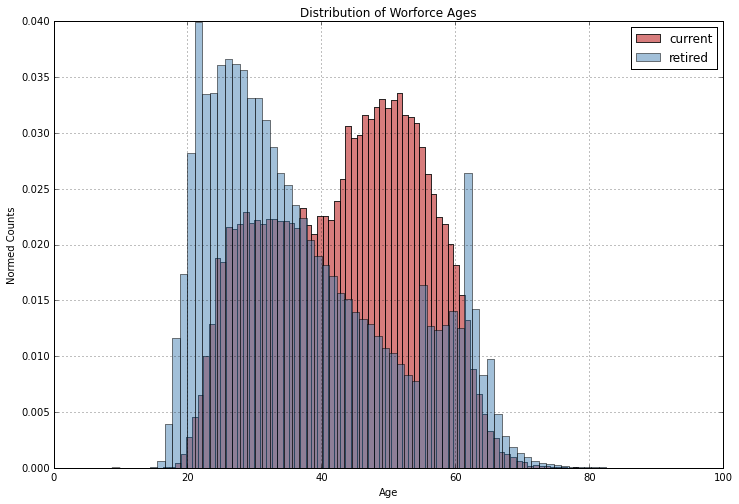

In [177]:
# look at these distributions
plt.figure(figsize=(12,8))
cur_empl.Age_years.hist(bins=80,color='indianred',label='current',alpha=0.8,normed=True)
ret_empl.Age_years.hist(bins=80,color='steelblue',label='retired',alpha=0.5,normed=True)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Normed Counts')
plt.title('Distribution of Worforce Ages')

In [180]:
ret_empl.Age_years.describe(), cur_empl.Age_years.describe()

(count    172554.000000
 mean         37.290239
 std          13.720242
 min           8.777730
 25%          26.103205
 50%          33.687208
 75%          46.853803
 max          98.197773
 dtype: float64, count    70609.000000
 mean        43.646929
 std         11.307643
 min         16.424704
 25%         34.193721
 50%         44.830489
 75%         52.652690
 max         84.311108
 dtype: float64)

In [182]:
# how many are younger than 16?
sum(ret_empl.Age_years < 16.01), sum(cur_empl.Age_years < 16.01)

(20, 0)

In [189]:
#
time_checking_cols = [a for a in date_columns]
time_checking_cols.append('Tenure_months')
time_checking_cols.append('Age_years')
time_checking_cols.append('CUR_LOC_MOS')

In [190]:
ret_empl[ret_empl.Age_years<16.01][time_checking_cols]

TERMINATION_DT    HIRE_DT SERVICE_DT LAST_HIRE_DT  BIRTHDATE  \
4250       1988-12-30 1988-12-27 1988-12-27   1988-12-27 1973-01-22   
6094       1989-06-27 1989-06-12 1989-06-12   1989-06-12 1974-01-04   
14341      1991-06-14 1991-04-29 1991-04-29   1991-04-29 1975-10-24   
15533      1991-08-30 1991-07-29 1991-07-29   1991-07-29 1976-05-25   
21907      1993-07-13 1993-06-28 1993-06-28   1993-06-28 1978-04-02   
43668      1997-07-31 1997-07-25 1997-07-25   1997-07-25 1981-09-28   
43778      1997-08-01 1997-07-25 1997-07-25   1997-07-25 1982-12-22   
55834      1999-06-25 1999-06-14 1999-06-14   1999-06-14 1984-02-14   
65917      2002-08-13 2002-06-18 2002-06-18   2002-06-18 1986-08-14   
66660      2001-08-31 2001-06-25 2001-06-25   2001-06-25 1985-12-23   
74625      2000-06-08 1999-10-25 1999-10-25   1999-10-25 1984-06-10   
99982      2012-07-27 2012-06-01 2012-06-01   2012-06-01 1996-09-27   
106950     2009-07-31 2009-06-05 2009-06-05   2009-06-05 1994-01-25   
114869     2001-05-25 2001-05-07 2001-05-07   2001-05-07 1985-12-01   
132192     2001-01-05 2000-12-27 2000-12-27   2000-12-27 1985-12-03   
145920     2005-09-16 2005-02-14 2005-02-14   2005-02-14 1989-12-20   
146189     1993-02-28 1997-09-29 1997-09-29   1997-09-29 1977-10-06   
146637     2002-08-09 2002-06-17 2002-06-17   2002-06-17 1986-08-12   
147755     2001-05-25 2013-05-20 2013-05-20   2013-05-20 1992-08-14   
168700     2014-08-01 2014-06-06 2014-06-06   2014-06-06 1999-07-21   

        Tenure_months  Age_years  CUR_LOC_MOS  
4250         0.098565  15.937357     0.000000  
6094         0.492823  15.477388     0.000000  
14341        1.511325  15.638925     0.000000  
15533        1.051356  15.263832     0.000000  
21907        0.492823  15.280259     0.000000  
43668        0.197129  15.838792     0.000000  
43778        0.229984  14.609472     0.000000  
55834        0.361404  15.359658     0.000000  
65917        1.839874  15.997591     1.870968  
66660        2.201277  15.688207     2.225806  
74625        7.458059  15.994853     7.483871  
99982        1.839874  15.830578     1.870968  
106950       1.839874  15.512981     1.870968  
114869       0.591388  15.480126     0.612903  
132192       0.295694  15.091343     0.322581  
145920       7.030945  15.740227     7.096774  
146189     -54.999076  15.397989    17.935484  
146637       1.741309  15.992115     1.774194  
147755    -143.838683   8.777730     2.451613  
168700       1.839874  15.031109     1.870968

In [186]:
ret_empl.Tenure_months.describe(), cur_empl.Tenure_months.describe()

(count    172554.000000
 mean         90.309415
 std         126.594689
 min        -143.838683
 25%           6.340993
 50%          29.799380
 75%         120.511715
 max         781.519128
 dtype: float64, count    70609.000000
 mean       176.848788
 std        135.307106
 min          0.098565
 25%         35.516130
 50%        176.562147
 75%        285.278959
 max        738.972053
 dtype: float64)

In [188]:
sum(ret_empl.Tenure_months < 0), sum(cur_empl.Tenure_months < 0)

(157, 0)

# Cleaning up these dates
### remove the negative tenure cases

In [191]:
ret_empl2 = ret_empl[ret_empl.Tenure_months>=0].copy()
len(ret_empl2)

172397

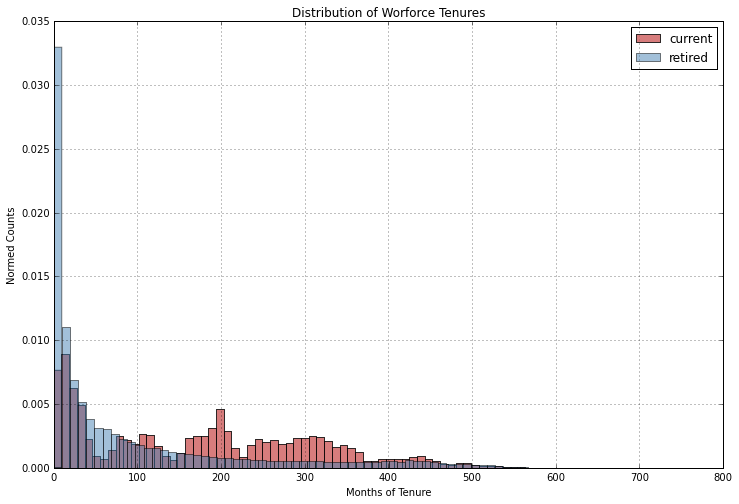

In [192]:
# look at these distributions
plt.figure(figsize=(12,8))
cur_empl.Tenure_months.hist(bins=80,color='indianred',label='current',alpha=0.8,normed=True)
ret_empl2.Tenure_months.hist(bins=80,color='steelblue',label='retired',alpha=0.5,normed=True)
plt.legend()
plt.xlabel('Months of Tenure')
plt.ylabel('Normed Counts')
plt.title('Distribution of Worforce Tenures')

In [193]:
ret_empl2.Age_years.describe()

count    172397.000000
mean         37.296686
std          13.721343
min          14.609472
25%          26.108681
50%          33.695422
75%          46.859278
max          98.197773
dtype: float64

In [195]:
print sum(ret_empl2.Age_years < 16.01)
ret_empl2[ret_empl2.Age_years < 16.01][time_checking_cols]

18


TERMINATION_DT    HIRE_DT SERVICE_DT LAST_HIRE_DT  BIRTHDATE  \
4250       1988-12-30 1988-12-27 1988-12-27   1988-12-27 1973-01-22   
6094       1989-06-27 1989-06-12 1989-06-12   1989-06-12 1974-01-04   
14341      1991-06-14 1991-04-29 1991-04-29   1991-04-29 1975-10-24   
15533      1991-08-30 1991-07-29 1991-07-29   1991-07-29 1976-05-25   
21907      1993-07-13 1993-06-28 1993-06-28   1993-06-28 1978-04-02   
43668      1997-07-31 1997-07-25 1997-07-25   1997-07-25 1981-09-28   
43778      1997-08-01 1997-07-25 1997-07-25   1997-07-25 1982-12-22   
55834      1999-06-25 1999-06-14 1999-06-14   1999-06-14 1984-02-14   
65917      2002-08-13 2002-06-18 2002-06-18   2002-06-18 1986-08-14   
66660      2001-08-31 2001-06-25 2001-06-25   2001-06-25 1985-12-23   
74625      2000-06-08 1999-10-25 1999-10-25   1999-10-25 1984-06-10   
99982      2012-07-27 2012-06-01 2012-06-01   2012-06-01 1996-09-27   
106950     2009-07-31 2009-06-05 2009-06-05   2009-06-05 1994-01-25   
114869     2001-05-25 2001-05-07 2001-05-07   2001-05-07 1985-12-01   
132192     2001-01-05 2000-12-27 2000-12-27   2000-12-27 1985-12-03   
145920     2005-09-16 2005-02-14 2005-02-14   2005-02-14 1989-12-20   
146637     2002-08-09 2002-06-17 2002-06-17   2002-06-17 1986-08-12   
168700     2014-08-01 2014-06-06 2014-06-06   2014-06-06 1999-07-21   

        Tenure_months  Age_years  CUR_LOC_MOS  
4250         0.098565  15.937357     0.000000  
6094         0.492823  15.477388     0.000000  
14341        1.511325  15.638925     0.000000  
15533        1.051356  15.263832     0.000000  
21907        0.492823  15.280259     0.000000  
43668        0.197129  15.838792     0.000000  
43778        0.229984  14.609472     0.000000  
55834        0.361404  15.359658     0.000000  
65917        1.839874  15.997591     1.870968  
66660        2.201277  15.688207     2.225806  
74625        7.458059  15.994853     7.483871  
99982        1.839874  15.830578     1.870968  
106950       1.839874  15.512981     1.870968  
114869       0.591388  15.480126     0.612903  
132192       0.295694  15.091343     0.322581  
145920       7.030945  15.740227     7.096774  
146637       1.741309  15.992115     1.774194  
168700       1.839874  15.031109     1.870968

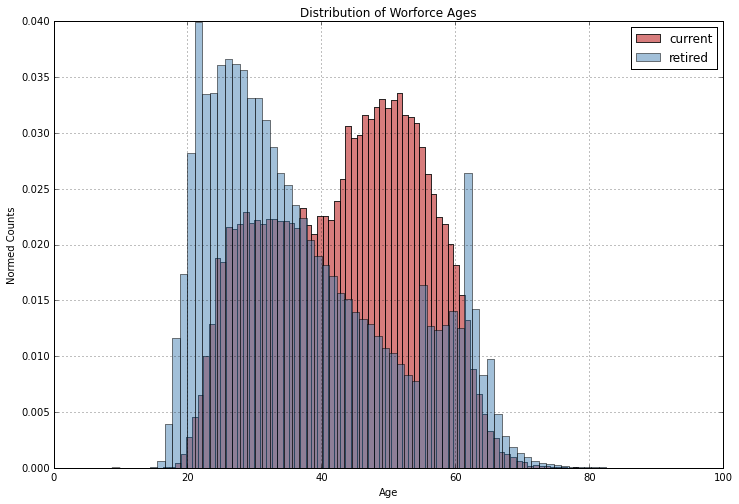

In [196]:
# look at these distributions
plt.figure(figsize=(12,8))
cur_empl.Age_years.hist(bins=80,color='indianred',label='current',alpha=0.8,normed=True)
ret_empl.Age_years.hist(bins=80,color='steelblue',label='retired',alpha=0.5,normed=True)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Normed Counts')
plt.title('Distribution of Worforce Ages')

## Now I need to deal with the intern issue


In [197]:
cur_empl.INTERN.value_counts()

N    65872
Y     4737
dtype: int64

In [198]:
ret_empl2.INTERN.value_counts()

N    122130
Y     50267
dtype: int64

In [199]:
ret_empl2 = ret_empl2[ret_empl2.INTERN=='N']#.copy()
print len(ret_empl2)
cur_empl2 = cur_empl[cur_empl.INTERN=='N'].copy()
print len(cur_empl2)

122130
65872


# Repeat the above histograms

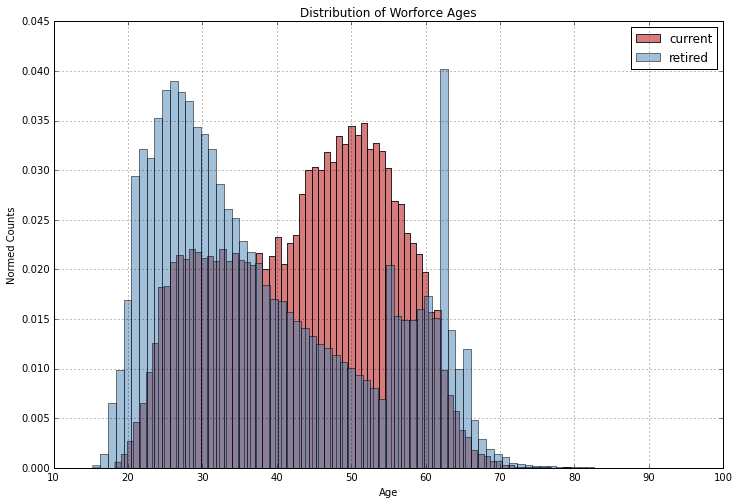

In [200]:
# look at these distributions
plt.figure(figsize=(12,8))
cur_empl2.Age_years.hist(bins=80,color='indianred',label='current',alpha=0.8,normed=True)
ret_empl2.Age_years.hist(bins=80,color='steelblue',label='retired',alpha=0.5,normed=True)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Normed Counts')
plt.title('Distribution of Worforce Ages')

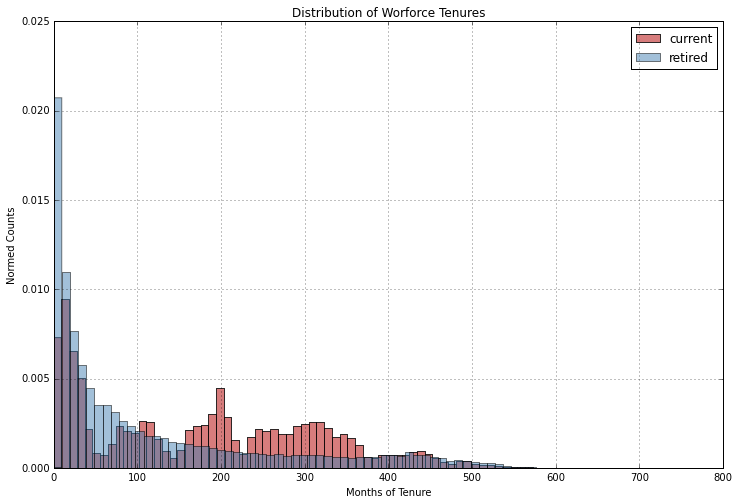

In [201]:
# look at these distributions
plt.figure(figsize=(12,8))
cur_empl2.Tenure_months.hist(bins=80,color='indianred',label='current',alpha=0.8,normed=True)
ret_empl2.Tenure_months.hist(bins=80,color='steelblue',label='retired',alpha=0.5,normed=True)
plt.legend()
plt.xlabel('Months of Tenure')
plt.ylabel('Normed Counts')
plt.title('Distribution of Worforce Tenures')

In [202]:
sum(ret_empl2.Tenure_months < 0), sum(cur_empl2.Tenure_months < 0)

(0, 0)

In [204]:
cur_empl2.Tenure_months.describe()#hist(color='indianred',bins=)

count    65872.000000
mean       178.504781
std        137.114172
min          0.098565
25%         34.366209
50%        179.026263
75%        289.451529
max        738.972053
dtype: float64

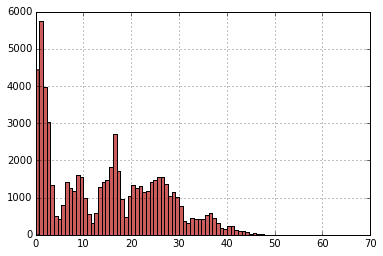

In [207]:
(cur_empl2.Tenure_months/12.).hist(bins=80,color='indianred')

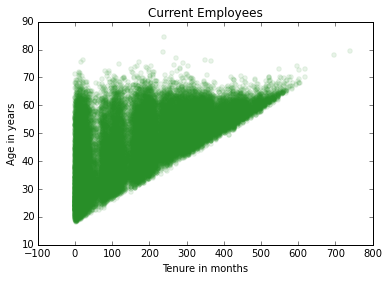

In [210]:
plt.scatter(cur_empl2.Tenure_months.values,cur_empl2.Age_years,color='forestgreen',alpha=0.1)
plt.xlabel('Tenure in months')
plt.ylabel('Age in years')
plt.title('Current Employees')

In [212]:
cur_empl2[['Age_years','Tenure_months']].corr()

Age_years  Tenure_months
Age_years       1.000000       0.714688
Tenure_months   0.714688       1.000000

In [215]:
cur_empl2.REMOTE.value_counts(), cur_empl.REMOTE.value_counts()

(N    57221
 Y     8651
 dtype: int64, N    60565
 Y    10044
 dtype: int64)

In [17]:
benefits_df = pandas_read_hdfs(infilenames[5])

In [18]:
benefits_df.shape, benefits_df.columns

((86954, 4),
 Index([u'KEY', u'HAVE_INS', u'HAVE_DEP', u'COUNT               '], dtype='object'))

In [19]:
benefits_df.head()

KEY HAVE_INS HAVE_DEP  COUNT               
0  782034519027003        Y        N                     0
1  606846618748664        Y        Y                     1
2  932378015449447        Y        Y                     2
3  892115452742258        Y        N                     0
4  149888337659598        Y        Y                     1

In [218]:
histcurr_df[histcurr_df.SKEY == '148161780158'][['KEY','LOCATION','JOBCODE','CUR_JOB_MOS','MAX_RT_ANNUAL','TERMINATION_DT','INTERN']]#,COUNT','COUNT.1']]

KEY LOCATION  JOBCODE  CUR_JOB_MOS  MAX_RT_ANNUAL  \
46438  814417112066605    00915     1460    19.645161      104638.38   
46439  771832764973786    00915     1460    26.258065      104638.38   
46440  316924511602579    18195     1460     7.677419      104638.38   
46441  533698237283946    27536     1460     7.677419      104638.38   

       TERMINATION_DT INTERN  
46438             NaN      Y  
46439             NaN      Y  
46440             NaN      N  
46441             NaN      N

In [245]:
tkey = '148161780158'
cur_empl[cur_empl.SKEY == tkey][['KEY','ACTRES1','LOCATION','FUNC_ID_SFI','JOBCODE','CUR_JOB_MOS','Tenure_months','TERMINATION_DT','HIRE_DT','INTERN']]#,COUNT','COUNT.1']]

KEY                                            ACTRES1  \
46438  814417112066605  ORGANIZATIONAL CHANGES;SALARY ADJUSTMENT;INCEN...   
46439  771832764973786             ORGANIZATIONAL CHANGES;INCENTIVE;MERIT   
46440  316924511602579  ORGANIZATIONAL CHANGES;RRTR W/JOB NUMBER CHANG...   
46441  533698237283946  MISCELLANEOUS DATA CHANGE;ORGANIZATIONAL CHANG...   

      LOCATION  FUNC_ID_SFI  JOBCODE  CUR_JOB_MOS  Tenure_months  \
46438    00915           34     1460    19.645161      66.563995   
46439    00915           34     1460    26.258065      31.376414   
46440    18195           34     1460     7.677419      19.877205   
46441    27536           34     1460     7.677419      19.877205   

      TERMINATION_DT    HIRE_DT INTERN  
46438     2015-01-01 2009-06-15      Y  
46439     2015-01-01 2012-05-21      Y  
46440     2015-01-01 2013-05-06      N  
46441     2015-01-01 2013-05-06      N

In [235]:
tkey = '148161780158'
ret_empl[ret_empl.SKEY == tkey][['KEY','LOCATION','JOB_FUNCTION','JOBCODE','CUR_JOB_MOS','Tenure_months','TERMINATION_DT','HIRE_DT','INTERN','COMP_FREQUENCY']]#,COUNT','COUNT.1']]

KEY LOCATION JOB_FUNCTION JOBCODE  CUR_JOB_MOS  \
171417  476840249019135    00915          NSA    1043     6.838710   
171418  914194287692287    00915          NSA    1043     2.451613   
171419  379825847865933    00915          NSA    1043     2.451613   
171420  654490583415372    00915          NSA    1043     2.193548   
171421  204950647058408    00915          PTD    1446    15.838710   

        Tenure_months TERMINATION_DT    HIRE_DT INTERN COMP_FREQUENCY  
171417       6.768106     2013-05-09 2012-10-15      Y              H  
171418       2.431261     2013-08-02 2013-05-20      Y              H  
171419      38.604489     2014-08-01 2011-05-14      Y              H  
171420      25.429680     2014-08-01 2012-06-18      Y              H  
171421     180.439023     2014-09-05 1999-08-23      N              A

In [226]:
sum(cur_empl.JOBCODE == 1043), sum(ret_empl.JOBCODE == '1043')

(29, 179)

In [244]:
cur_empl[cur_empl.JOBCODE==1043][['LOCATION','ACTRES1','INTERN','CUR_JOB_MOS','Tenure_months','Age_years','HIRE_DT','COMP_FREQUENCY','MAX_RT_ANNUAL']]

LOCATION                                            ACTRES1 INTERN  \
46141    00523  LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;MIS...      Y   
46142    00523  LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;MIS...      Y   
46143    00523  LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;EMP...      Y   
46175    00523  MISCELLANEOUS DATA CHANGE;MISCELLANEOUS DATA C...      Y   
46249    00523                            LEAVE OF ABSENCE;REHIRE      Y   
46250    00523  TRANSFER W/ JOB NUMBER CHANGE;MISCELLANEOUS DA...      Y   
46251    00523  LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;MIS...      Y   
46252    00523  LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;MIS...      Y   
46253    00523  LEAVE OF ABSENCE;REHIRE;RETURN TO SCHOOL;EMPLO...      Y   
46254    00523  LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;MIS...      Y   
46255    00523  LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;EMP...      Y   
46256    00523  LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;LEA...      Y   
46257    00523  LEAVE OF ABSENCE;LEAVE OF ABSENCE;LEAVE OF ABS...      Y   
46258    00523        MISCELLANEOUS DATA CHANGE;EMPLOYEE NEW HIRE      Y   
46259    00523  LEAVE OF ABSENCE;LEAVE OF ABSENCE;LEAVE OF ABS...      Y   
46260    00523                 LEAVE OF ABSENCE;EMPLOYEE NEW HIRE      Y   
46261    00523                                  EMPLOYEE NEW HIRE      Y   
46262    00523                 LEAVE OF ABSENCE;EMPLOYEE NEW HIRE      Y   
46442    00523  LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;TRA...      Y   
46443    00523  LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;MIS...      Y   
46444    00523  LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;TRA...      Y   
46445    00523  LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;MIS...      Y   
46446    00523  LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;EMP...      Y   
46447    00523  LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;EMP...      Y   
46464    27536        MISCELLANEOUS DATA CHANGE;EMPLOYEE NEW HIRE      Y   
46465    27536        MISCELLANEOUS DATA CHANGE;EMPLOYEE NEW HIRE      Y   
46485    27515  LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;EMP...      Y   
46486    27515  LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;EMP...      Y   
46487    27515  LEAVE OF ABSENCE;MISCELLANEOUS DATA CHANGE;EMP...      Y   

       CUR_JOB_MOS  Tenure_months  Age_years    HIRE_DT COMP_FREQUENCY  \
46141    11.354839      43.072753  22.278349 2011-05-31              H   
46142     7.322581       7.392349  22.108599 2014-05-21              H   
46143     4.193548       4.238280  21.810167 2014-08-25              H   
46175    23.548387      35.516130  24.200360 2012-01-16              H   
46249     4.193548      67.582497  23.368036 2009-05-15              H   
46250     6.870968      30.686462  21.032602 2012-06-11              H   
46251    19.580645      19.647221  21.971704 2013-05-13              H   
46252    15.806452      15.836054  21.415909 2013-09-06              H   
46253     4.193548      11.367790  21.352937 2014-01-20              H   
46254    11.354839      11.367790  21.730768 2014-01-20              H   
46255     7.322581       7.392349  24.225001 2014-05-21              H   
46256     7.322581       7.392349  29.772001 2014-05-21              H   
46257     7.387097       7.458059  21.503522 2014-05-19              H   
46258     7.258065       7.326639  25.840366 2014-05-23              H   
46259     7.354839       7.425204  22.059317 2014-05-20              H   
46260     4.193548       4.238280  21.243420 2014-08-25              H   
46261     4.193548       4.238280  22.196212 2014-08-25              H   
46262     4.193548       4.238280  22.092172 2014-08-25              H   
46442     7.677419      55.294770  25.892387 2010-05-24              H   
46443    11.419355      31.606398  22.483692 2012-05-14              H   
46444    11.419355      22.735580  23.953948 2013-02-08              H   
46445    11.354839      11.367790  30.355175 2014-01-20              H   
46446     7.322581     

In [ ]:
%pylab inline

In [ ]:
benefits_df[benefits_df.columns[-1]].hist(color='steelblue',bins=51)
plt.ylim(0,20000)

In [ ]:
benefits_df[benefits_df.columns[-1]].value_counts()

### Look at some of the other input files

In [13]:
infilenames[4:]

['/data/discovery/hrsepara/core/SBR',
 '/data/discovery/hrsepara/core/SR_BENEFIT.txt',
 '/data/discovery/hrsepara/core/SR_CKE.txt',
 '/data/discovery/hrsepara/core/SR_COMP.txt',
 '/data/discovery/hrsepara/core/SR_CPR.txt',
 '/data/discovery/hrsepara/core/SR_EAS.txt',
 '/data/discovery/hrsepara/core/SR_EDU.txt',
 '/data/discovery/hrsepara/core/SR_INS.txt',
 '/data/discovery/hrsepara/core/SR_LANG.txt',
 '/data/discovery/hrsepara/core/SR_LIC.txt',
 '/data/discovery/hrsepara/core/SR_RELO.txt']

In [40]:
sbr_df = pandas_read_hdfs(infilenames[4])

CParserError: Error tokenizing data. C error: Expected 41 fields in line 162, saw 45


#### try to import sbr_mod (correcting for broken lines)


In [64]:
import re


pattern1 = '("[0-9]+)'
#matchObj = re.match( r'("[0-9]+)') #[0-9][0-9][0-9][0-9]+.*) are (.*?) .*', line, re.M|re.I)

list_of_good_lines = []
hold_line = None
sbr_infile = 'sbr_mod'
k=0
sfile = open(sbr_infile,'r')
for line in sfile:
    line=line.replace('\n', '. ')
    line=line.replace('\r','. ')
    if k == 0:
        sbr_columns = line.split(';')
        print len(sbr_columns)
        print "++++++++++++++++"
    #elif k< 30:
    else:
        if re.match(pattern1,line):
            # deal with case where 2 consequitive lines are good.
            if hold_line != None:
                list_of_good_lines.append(hold_line)
            #else:
            #    # now cat current line on to hold line
            #    hold_line
            hold_line = line#.strip(['\r\n')+'. '
            
     #       print line,'\t',k
        else:
            print "NO MATCH \t",k
            hold_line+=line
        
    k+=1

        
    

41
++++++++++++++++
NO MATCH 	2
NO MATCH 	3
NO MATCH 	4
NO MATCH 	5
NO MATCH 	6
NO MATCH 	12
NO MATCH 	13
NO MATCH 	21
NO MATCH 	27
NO MATCH 	28
NO MATCH 	36
NO MATCH 	41
NO MATCH 	45
NO MATCH 	46
NO MATCH 	47
NO MATCH 	48
NO MATCH 	49
NO MATCH 	50
NO MATCH 	51
NO MATCH 	52
NO MATCH 	56
NO MATCH 	57
NO MATCH 	58
NO MATCH 	59
NO MATCH 	60
NO MATCH 	61
NO MATCH 	71
NO MATCH 	76
NO MATCH 	96
NO MATCH 	98
NO MATCH 	106
NO MATCH 	107
NO MATCH 	109
NO MATCH 	110
NO MATCH 	113
NO MATCH 	117
NO MATCH 	118
NO MATCH 	124
NO MATCH 	126
NO MATCH 	127
NO MATCH 	128
NO MATCH 	129
NO MATCH 	136
NO MATCH 	137
NO MATCH 	138
NO MATCH 	139
NO MATCH 	140
NO MATCH 	142
NO MATCH 	143
NO MATCH 	144
NO MATCH 	145
NO MATCH 	146
NO MATCH 	147
NO MATCH 	148
NO MATCH 	149
NO MATCH 	156
NO MATCH 	176
NO MATCH 	177
NO MATCH 	178
NO MATCH 	182
NO MATCH 	191
NO MATCH 	192
NO MATCH 	193
NO MATCH 	194
NO MATCH 	195
NO MATCH 	196
NO MATCH 	197
NO MATCH 	198
NO MATCH 	199
NO MATCH 	200
NO MATCH 	201
NO MATCH 	202
NO MATC

In [61]:
for l in list_of_good_lines:
    print len(l.split(';'))

41
41
41
42
41
41
41
41
41
41
43
41
41
41
41
41
41
41


In [62]:
list_of_good_lines[0]

'"892115452742258";"EMPLOYEE";"2007";"PROACTIVE AND THOROUGH WITH JOB RESPONSIBILITIES. . PAYS CLOSE ATTENTION TO DETAIL . . ENSURES WORK PRODUCT IS ACCURATE AND COMPLETE";"PS";"PPACT";"EMPLOYEE";"2007";"ATTENDS STAFF MEETINGS. . ENSURES THAT WORK PRODUCT IS ACCURATE AND COMPLETE. . HELPS OTHERS IN SECTION AND OUTSIDE OF SECTION WHEN ASSISTANCE IS NEEDED. . ORGANIZED";"PS";"PPWORK";"";"";"";"";"";"";"";"";"";"";"";"";"";"";"";"14";"19";"0";"19";"3";"0";"";"";"";"";"";"";"";"";"". . '

In [63]:
list_of_good_lines[3]

'"953563650582714";"EMPLOYEE";"2012";"BETWEEN 2010 AND 2012, I CREATED SEVERAL MARKET OPPORTUNITY FUND MARKETING PROGRAMS THAT WERE FUNDED BY SPECIAL ALLOTMENTS OF ZONE AND VPA BUDGETED DOLLARS.  I DESIGNED THE PROGRAMS, INCLUDING BUDGET PROJECTIONS AND ANTICIPATED ROI, WORKING WITH MY VICE PRESIDENT AND MARKETING ANALYST.  THE PROGRAMS RESULTED IN SIGNIFICANT INCREASES OF DIRECT MAIL AND INTERNET LEAD AGGREGATOR ACTIVITY BY THE AGENTS IN THE MAINE AFO, WHERE WE EXCEEDED OUR PLAN GOALS RELATING TO MARKETING AND RAW NEW AUTO.";"PT";"PPWORK";"EMPLOYEE";"2013";"COMPETED IN Q1 AFS MKTG. FAST START, WHICH HAD 5 KEY METRICS TO DRIVE AUTO GROWTH:  INCREASE DIRECT MAIL AND SEQUENTIAL PROGRAM PARTICIPATION, ACHIEVE BANK TARGETS, MAXIMIZE USE OF LEAD ALERTS, AND HIGH ENGAGEMENT WITH OUR AUTOMATED DIRECT MAIL SYSTEM.  I ENGAGED MY AGENTS BY SHOWING THE BENEFITS OF EACH, COACHING TEAM MEMBERS, TEACHING HOW TO USE THE TOOLS, INSTALLING THE PROGRAM, AND ATTACHING MAIL TO LISTS I CREATED.  I ACHIEVED

In [43]:

k=0
sfile = open(sbr_infile,'r')
for line in sfile:
#
#    line = f.split(';')
    print len(line.split(';')),k
    k+=1
    

41 0
4 1
1 2
6 3
1 4
1 5
33 6
41 7
41 8
42 9
41 10
4 11
1 12
38 13
41 14
41 15
41 16
41 17
43 18
41 19
4 20
38 21
41 22
41 23
41 24
41 25
4 26
1 27
38 28
41 29
41 30
41 31
41 32
41 33
41 34
24 35
18 36
41 37
41 38
50 39
19 40
23 41
41 42
41 43
4 44
1 45
1 46
1 47
6 48
1 49
6 50
1 51
28 52
41 53
41 54
4 55
6 56
1 57
1 58
6 59
6 60
23 61
41 62
41 63
49 64
41 65
44 66
41 67
41 68
41 69
14 70
28 71
41 72
41 73
49 74
14 75
28 76
41 77
41 78
41 79
41 80
41 81
42 82
41 83
41 84
41 85
42 86
41 87
41 88
41 89
41 90
41 91
41 92
41 93
41 94
4 95
38 96
4 97
38 98
41 99
41 100
41 101
41 102
41 103
41 104
4 105
1 106
38 107
4 108
6 109
33 110
41 111
19 112
23 113
41 114
41 115
9 116
1 117
33 118
41 119
41 120
41 121
42 122
4 123
38 124
4 125
1 126
6 127
1 128
33 129
41 130
41 131
41 132
41 133
45 134
14 135
1 136
6 137
1 138
6 139
18 140
4 141
6 142
1 143
11 144
1 145
1 146
6 147
1 148
18 149
41 150
41 151
41 152
41 153
42 154
24 155
18 156
41 157
41 158
41 159
41 160
42 161
41 162
41 163
41 164
41 

In [ ]:
sbr_dfa = pd.read_csv(sbr_infile,delimiter=';',quoting=

In [17]:
benefit_df = pandas_read_hdfs(infilenames[5])


In [20]:
cke_df = pandas_read_hdfs(infilenames[6])

In [21]:
print cke_df.shape

(83842, 5)


In [22]:
comp_df = pandas_read_hdfs(infilenames[7])
print comp_df.shape

(21208, 91)


In [26]:
cpr_df = pandas_read_hdfs(infilenames[8])
print cpr_df.shape

(59353, 16)


In [39]:
cpr_df.head()

KEY     EFFDT  PERFORMANCE POTENTIAL CPR_POSPOTENT1_SFI  \
0  892115452742258  02/05/11  EXCEPTIONAL  MODERATE                NaN   
1  149888337659598  05/05/07    EFFECTIVE  MODERATE                NaN   
2  669514247062390  01/09/12  EXCEPTIONAL   HIGHEST                 CC   
3  831386061306757  01/17/15    EFFECTIVE  ADVANCED                NaN   
4  850863966555737  12/20/14    EFFECTIVE  MODERATE                NaN   

  CPR_READY1_SFI CPR_READYTIME1_D CPR_APPRV1_SFI CPR_POSPOTENT2_SFI  \
0            NaN              NaN            NaN                NaN   
1            NaN              NaN            NaN                NaN   
2             RN              NaN              N                NaN   
3            NaN              NaN            NaN                NaN   
4            NaN              NaN            NaN                NaN   

  CPR_READY2_SFI CPR_READYTIME2_D CPR_APPRV2_SFI CPR_POSPOTENT3_SFI  \
0            NaN              NaN            NaN                NaN   
1            NaN              NaN            NaN                NaN   
2            NaN              NaN            NaN                NaN   
3            NaN              NaN            NaN                NaN   
4            NaN              NaN            NaN                NaN   

  CPR_READY3_SFI CPR_READYTIME3_D  \
0            NaN              NaN   
1            NaN              NaN   
2            NaN              NaN   
3            NaN              NaN   
4            NaN              NaN   

  CPR_APPRV3_SFI                                         
0                                                ...     
1                                                ...     
2                                                ...     
3                                                ...     
4                                                ...

In [27]:
eas_df = pandas_read_hdfs(infilenames[9])
print eas_df.shape

(156239, 81)


In [38]:
eas_df.head()

KEY  PDUSED1  PDUSED2  PDUSED3  PDUSED4  PDUSED5  PDUSED6  \
0  8.921155e+14     3.50     4.25     7.25     1.25     11.5      2.5   
1           NaN    62.00    50.25    73.50     0.00      0.0   1550.0   
2  1.498883e+14     6.25     3.25    11.00     8.75      7.5      3.5   
3  1.550000e+03  1550.00  1550.00  1666.25  1666.25      0.0      0.0   
4  3.612465e+14     0.00     0.00    11.50     5.50      8.0      9.5   

   PDUSED7  PDUSED8  PDUSED9   ...     PVBAL1  PVBAL2  PVBAL3  PVBAL4  PVBAL5  \
0        6     6.50     2.00   ...        NaN     NaN     NaN     NaN     NaN   
1     1550  1550.00  1666.25   ...        NaN     NaN     NaN     NaN     NaN   
2        0     0.00     0.00   ...        NaN     NaN     NaN     NaN     NaN   
3        0     0.00    11.25   ...        NaN     NaN     NaN     NaN     NaN   
4       11     8.25     6.50   ...     353.25   232.5   232.5   232.5   232.5   

   PVBAL6  PVBAL7  PVBAL8  PVBA\r\nL9  \
0     NaN     NaN     NaN         NaN   
1     NaN     NaN     NaN         NaN   
2     NaN     NaN     NaN         NaN   
3     NaN     NaN     NaN         NaN   
4   232.5   232.5   232.5           0   

   PVBAL10                                                                                                                                                                                                                                                                                                 
0                                                NaN                                                                                                                                                                                                                                                       
1                                                NaN                                                                                                                                                                                                                                                       
2                                                NaN                                                                                                                                                                                                                                                       
3                                                NaN                                                                                                                                                                                                                                                       
4                       0                                                                                                                                                                                                                                                                                  

[5 rows x 81 columns]

In [28]:
edu_df = pandas_read_hdfs(infilenames[10])
In [28]:

edu_df = pandas_read_hdfs(infilenames[10])
print edu_df.shape

(68058, 15)


In [37]:
edu_df.head()

KEY                 MAJOR1 MAJOR2 MAJOR3  SCHOOL1  SCHOOL2  \
0  149888337659598               FORESTRY    NaN    NaN   183044      NaN   
1  760178701374763  PUBLIC ADMINISTRATION    NaN    NaN   183080      NaN   
2  953563650582714         BUSINESS ADMIN    NaN    NaN   183044      NaN   
3  669514247062390                ENGLISH    NaN    NaN   150400      NaN   
4  831386061306757    BUSINESS MANAGEMENT    NaN    NaN   220075      NaN   

   SCHOOL3    HIGHEST  DEG_CNT  ASSOC_CNT  BELOW_ASSOC_CNT  BACH_CNT  \
0      NaN  BACHELORS        1          0                0         1   
1      NaN  BACHELORS        1          0                2         1   
2      NaN  BACHELORS        1          0                0         1   
3      NaN  BACHELORS        1          0                1         1   
4      NaN  BACHELORS        1          0                0         1   

   MASTER_CNT  ADVANCE_CNT  \
0           0            0   
1           0            0   
2           0            0   
3           0            0   
4           0            0   

  RECENT_DT                                                                                                                                            
0  06/01/71                                      ...                                                                                                   
1  07/01/85                                      ...                                                                                                   
2  05/30/92                                      ...                                                                                                   
3  06/01/82                                      ...                                                                                                   
4  12/16/91                                      ...

In [29]:
ins_df = pandas_read_hdfs(infilenames[11])
print ins_df.shape

(45326, 15)


In [36]:
ins_df.head()

KEY  INS1  INS2  INS3  INS4  INS5 INS6 INS7 INS8 INS9 INS10  \
0  760178701374763  ICAR   AIC   NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   
1  953563650582714   AIC  CPCU   NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   
2  669514247062390   INS  CPCU   CLU   CLF  CASL  NaN  NaN  NaN  NaN   NaN   
3  831386061306757   AIC  CPCU  FCLS  CHFC   NaN  NaN  NaN  NaN  NaN   NaN   
4  605346172864244   AIC  CPCU   NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   

   LAST_COM  LAST_INP  COM_CNT  \
0      2012      1992        1   
1      2012       NaN        2   
2      1999      2005        3   
3      2006      2012        3   
4       NaN      2007        0   

   INP_CNT                                                                                                                                                                                        
0                                                  1                                                                                                                                              
1                                                  0                                                                                                                                              
2                                                  2                                                                                                                                              
3                                                  1                                                                                                                                              
4                                                  2

In [30]:
lang_df = pandas_read_hdfs(infilenames[12])
print lang_df.shape

(12236, 6)


In [35]:
lang_df.head()

KEY  INTERPRET_PROF  READ_PROF  SPEAK_PROF  TRANSLATE_PROF  \
0  734958457637093               2          2           2               2   
1  760669954940989             NaN          1           1               1   
2  165020081757112               1          1           1               5   
3  535811060357751               1          1           1               1   
4  515449968406674               4          4           4               4   

   WRITE_PROF                                                                                                                                                                                                                                 
0                                                  2                                                                                                                                                                                          
1                                                  1                                                                                                                                                                                          
2                                                  1                                                                                                                                                                                          
3                                                  1                                                                                                                                                                                          
4                                                  4

In [31]:
lic_df = pandas_read_hdfs(infilenames[13])
print lic_df.shape

(44554, 2)


In [32]:
lic_df.head()

KEY  \
0  892115452742258   
1  760178701374763   
2  357659299093140   
3  953563650582714   
4  669514247062390   

  CONCAT_LIC                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
0  NOTPUB:IL                                     ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
1  ASE,ASE-MEC,ASE-NSDR,ASE-PR,ASE-SADR,AUTO MEC,...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
2  NOTPUB:TN                                     ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
3  AGENTLAH:ME,AGENTLAH:GA,AGENTPC:ME,AGENTPC:GA ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
4  SERIES 6:IL,SERIES26:IL,SERIES63:IL           ...

In [33]:
relo_df = pandas_read_hdfs(infilenames[14])
print relo_df.shape

(183783, 9)


In [34]:
relo_df.head()

KEY  REASGN_PREF1  REASGN_PREF2  REASGN_PREF3  REASGN_PREF4  \
0  782034519027003           NaN           NaN           NaN           NaN   
1  606846618748664           NaN           NaN           NaN           NaN   
2  397026582340257           NaN           NaN           NaN           NaN   
3  932378015449447           NaN           NaN           NaN           NaN   
4  892115452742258           NaN           NaN           NaN           NaN   

   REASGN_PREF5  RELO_CNT ALL_STATE  \
0           NaN         0         N   
1           NaN        10         N   
2           NaN        11         N   
3           NaN        24         N   
4           NaN         0         N   

  CONCAT_ST                                                                                                                                                                                           
0                                                ...                                                                                                                                                  
1  AZ,CO,NC,NJ,NM,NV,NY,UT,VA,WY                 ...                                                                                                                                                  
2  AL,AR,CT,KY,LA,ME,MS,NH,NY,TN,VT              ...                                                                                                                                                  
3  AB,AK,CA,DC,DE,HI,ID,IL,MD,MI,MN,MT,NB,NC,NJ,N...                                                                                                                                                  
4                                                ...

# Working in Impala
## Step 1 is to connect to the correct host
Using impyla seems to mimics the impala-shell (CLI) pretty closely.

Some important points to keep in mind/equivalencies

* `impala-shell -i host:port` is equivalent to `connect(host=hostname,port=portnumber)`
* `cursor = connect(...).cursor()` yields access to the CLI via:
    - `cursor.execute(query)` followed by
    - `cursor.fetchall()` to return the results
* note that the queries don't have to end in a semicolon.    


In [ ]:
# connect to the correct host
myhostname = 'ac00h1pdata02.opr.statefarm.org' #hostname of G-building
myhostname = '
portnum = 21050 # default port number ??

In [ ]:
# connect to the correct host
myhostname = 'da74wbdn01.opr.statefarm.org' #hostname of PHDac00h1pdata02.opr.statefarm.org' #hostname of G-building
#myhostname = '' 
#you may use any of the datanodes from da74wbdn01 to da74wbdn27
portnum = 21050 # default port number ??

In [ ]:
from impala.dbapi import connect
conn = connect(host=myhostname, port=portnum,use_kerberos=True)
cur = conn.cursor()

In [ ]:
cur.execute('SHOW databases')

In [ ]:
cur.fetchall()

## Some utility functions 
1. list databases
    * type `cursor.execute("use dbasename")` to change to database
2. list tables
3. count lines in a table

In [ ]:
# list databases
def listDatabases(cursor):
    """
    input: the cursor connection input
    output: list of tables in active database
    """
    cursor.execute('SHOW databases')
    dbList = cursor.fetchall()
    return dbList

# list tables
def listTables(cursor):
    """
    input: the cursor connection input
    output: list of tables in active database
    """
    cursor.execute('SHOW tables')
    tblList = cursor.fetchall()
    return tblList
# count the number of lines in a given table
def countLines(cursor,tablename):
    qstring = "'select count(*) from "+tablename+"'"
    return cursor.execute(qstring)

In [ ]:
cur.close()

In [ ]:
# list the databases
listDatabases(cur)

In [ ]:
# change to desired database
cur.execute("use vehrepat")

In [ ]:
myTables=listTables(cur)
print len(myTables)
myTables

## See if I can create a new table from within notebook

In [ ]:
cur.execute("use default")

#### following https://github.com/cloudera/impyla/tree/master/examples/logr
## 2. create some fake data for classification

In [ ]:
import numpy as np
import sklearn.preprocessing
rows=10000
cols=2

In [ ]:
class0 = np.random.multivariate_normal([2,2], np.diag([1,1]),rows/2)
class1 = np.random.multivariate_normal([-2,-2], np.diag([1,1]),rows - rows/2)

In [ ]:
data = np.vstack((np.hstack((class0, np.zeros((rows / 2, 1)))),
                  np.hstack((class1, np.ones((rows - rows / 2, 1))))))
data = data[np.random.permutation(rows)]
scaled_obs = sklearn.preprocessing.StandardScaler().fit_transform(data[:, :2])
data = np.hstack((scaled_obs, data[:, 2].reshape(rows, 1)))

perform in-memory logistic regression with scikit-learn

In [ ]:
import sklearn.linear_model
inmemory_estimator = sklearn.linear_model.LogisticRegression(fit_intercept=False)
inmemory_estimator.fit(data[:, :cols], data[:, cols])

#3. Push the data into Impala


In [ ]:
# create the table to hold the data
cur.execute("CREATE TABLE test_logr (%s, label BOOLEAN)" % ', '.join(['feat%i DOUBLE' % i for i in xrange(cols)]))
# push the data to Impala with INSERT statements in batches of 1000 rows
data_strings = []
for i in xrange(rows):
    row_string = '(' + ', '.join([str(val) for val in data[i, :-1]]) + ', %s' % ('true' if data[i, -1] > 0 else 'false') + ')'
    data_strings.append(row_string)
    if (i + 1) % 1000 == 0:
        data_query = 'INSERT INTO test_logr VALUES %s' % ', '.join(data_strings)
        cursor.execute(data_query)
        data_strings = []

## 3b. Let me try to create the table from a dataset already in HDFS

In [ ]:
!hdfs dfs -ls /user/kesj/sample_data

In [ ]:
my_infile = '/user/kesj/sample_data/impyla_census_raw.csv'

In [ ]:
create_table_query = """
    CREATE EXTERNAL TABLE IF NOT EXISTS census_text (age INT, workclass STRING,
            final_weight INT, education STRING, education_num INT,
            marital_status STRING, occupation STRING, relationship STRING,
            race STRING, sex STRING, hours_per_week INT, native_country STRING,
            income STRING)
    ROW FORMAT DELIMITED FIELDS TERMINATED BY '\t'
    STORED AS TEXTFILE
    LOCATION '/user/kesj/sample_data/impyla_census_raw.csv'
"""

In [ ]:
cur.execute(create_table_query)

In [ ]:
from impala.util import as_pandas
#cur.execute('SELECT * FROM y1753caale')
#cur.execute('select * FROM p3533eeb_detl')
cur.execute('select * FROM y1753caaestparty')
le = as_pandas(cur)
print len(le)


In [ ]:
le.head()

In [ ]:
#sq1 = "'select * from "+myTables[1][0]+"'"
#cur.execute(sq1)
cur.execute('select * from y1753caadetl')
detl = as_pandas(cur)

In [ ]:
print shape(detl)

In [ ]:
len(le.groupby('los_est_dim_id'))

In [ ]:
le.los_est_dim_id.head()

In [ ]:
ledi0 = 85051447
sum(detl['los_est_dim_id']==ledi0)
#detl[['los_est_dim_id','est_ver_num','prt_clas_cd']]

In [ ]:
detl[detl['los_est_dim_id']==ledi0][['est_ver_num','oem_prt_num','line_desc_txt','prt_clas_cd','prt_qty_cnt','price_amt','ver_num',]]

In [ ]:
print len(le[le['los_est_dim_id']==ledi0])
le[le['los_est_dim_id']==ledi0][['vndr_veh_cd','los_tstmp','prmry_poi_cd','scdy_poi_cd','fdw_rplc_tstmp']]

In [ ]:
le.columns.values

In [ ]:
len(detl.prt_clas_cd.unique())

In [ ]:
y17533caaPRTcounts = detl.prt_clas_cd.value_counts()
y17533caaPRTcounts.tail(-1).hist(color='steelblue',bins=50)

In [ ]:
detl[detl.prt_clas_cd == '88JHR']['line_desc_txt']

In [ ]:
le[le.los_est_dim_id == ledi0]['vndr_cd']

In [ ]:
cur.execute("CREATE external TABLE page_view(viewTime INT, userid BIGINT,\
                page_url STRING, referrer_url STRING,\
                ip STRING COMMENT 'IP Address of the User')\
COMMENT 'This is the page view table'\
PARTITIONED BY(dt STRING, country STRING)\
CLUSTERED BY(userid) SORTED BY(viewTime) INTO 32 BUCKETS\
ROW FORMAT DELIMITED\
        FIELDS TERMINATED BY '1'\
        COLLECTION ITEMS TERMINATED BY '2'\
        MAP KEYS TERMINATED BY '3'\
STORED AS SEQUENCEFILE;")

In [ ]:
from pandas import *
from StringIO import StringIO

s = "sshpass -f myfilewithpassword ssh myusername@myhostname \"hive -S -e \\\"" \
"set hive.cli.print.header=true;" \
"SELECT * from mytable;\\\"\""

t = !$s
df = read_csv(StringIO(t.n), sep='\t')

In [ ]:
from pandas import *
from StringIO import StringIO

s = """
sshpass -f myfilewithpassword ssh myusername@myhostname \"
hive -S -e \\\"
set hive.cli.print.header=true;
SELECT * from mytable;
\\\"\"
"""

t = !$s
df = read_csv(StringIO(t.n), sep='\t'

In [ ]:
hdfsfiles = !hadoop fs -ls 